In [1]:
# import sys
# !{sys.executable} -m pip install pylab
import matplotlib.pyplot as plt
import pandas as pd
import glacierml as gl
import numpy as np
from scipy.stats import gaussian_kde
from tqdm import tqdm
pd.set_option('display.max_columns', None)


In [39]:
df = pd.read_csv('predicted_thicknesses/sermeq_aggregated_bootstrap_predictions_coregistration_df6.csv')


RGI = gl.RGI_loader()
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]

RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']

df = pd.merge(df, RGI, on = 'RGIId')

df['Upper Bound'] = df['Upper Bound'] - df['Mean Thickness']
df['Lower Bound'] = df['Mean Thickness'] - df['Lower Bound']
df['UB'] = (df['Upper Bound'] / 1e3) * df['Area']
df['LB'] = (df['Lower Bound'] / 1e3) * df['Area']

upper_bound = np.round(
    sum(df['UB']) / 1e3, 2)

lower_bound = np.round(
    sum(df['LB']) / 1e3 , 2) 
    
volume = np.round(
    sum(df['Mean Thickness'] / 1e3 * df['Area']) / 1e3, 2)

std = np.round(
    sum(df['Thickness Std Dev'] / 1e3 * df['Area']) / 1e3, 2)


print(f'Global Volume: {volume}, UB: {upper_bound}, LB: {lower_bound}, STD: {std}')
df

Global Volume: 100.71, UB: 38.55, LB: 41.9, STD: 41.54


,Unnamed: 0,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,UB,LB
0,0,RGI60-01.00001,15.058205,14.394442,7.228924,0.972120,1.467457e-26,9.026067,6.945618,6.769847,14.394442,3788.0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0.002437,0.002500
1,1,RGI60-01.00002,35.183497,34.964740,5.250191,0.964039,9.942309e-30,5.922333,4.467430,4.481674,34.964740,3788.0,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,0.002501,0.002493
2,2,RGI60-01.00003,32.929240,32.458823,4.903806,0.954451,7.690551e-33,5.378005,4.149014,4.229757,32.458823,3788.0,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,0.007127,0.006991
3,3,RGI60-01.00004,40.167706,39.662605,5.223219,0.979694,7.063799e-23,6.071764,4.732761,4.860424,39.662605,3788.0,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,0.017891,0.017421
4,4,RGI60-01.00005,41.946347,41.527788,5.498982,0.982597,3.432497e-21,6.559975,4.826692,5.045915,41.527788,3788.0,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,0.012983,0.012419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216454,216454,RGI60-19.02748,27.041792,25.068177,13.364698,0.962159,2.189570e-30,17.223910,12.743459,12.983216,25.068177,3788.0,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,0.000545,0.000535
216455,216455,RGI60-19.02749,37.510901,36.049745,14.919433,0.981499,7.501112e-22,19.616378,14.371468,14.432702,36.049745,3788.0,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,0.008183,0.008149
216456,216456,RGI60-19.02750,73.592344,72.255763,22.165036,0.993483,4.511299e-12,29.167062,21.621875,21.874806,72.255763,3788.0,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,0.090080,0.089039
216457,216457,RGI60-19.02751,90.997063,88.946020,25.569643,0.990014,1.085016e-15,33.598841,24.732496,25.244476,88.946020,3788.0,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,0.000278,0.000272


In [ ]:
ref = pd.read_csv('reference_thicknesses/farinotti_mean_thickness_rgi_id.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()

In [35]:
ref = pd.merge(ref, df, 
#                left_index = True, right_index = True)
on = [
    'RGIId'
])
ref = ref.rename(columns = {
    'Mean Thickness':'Edasi Mean Thickness'
})

ref['Farinotti Volume'] = (ref['Farinotti Mean Thickness'] / 1e3 )* ref['Area']

ref['region'] = ref['RGIId'].str[6:8]
ref['Edasi Volume'] = (ref['Edasi Mean Thickness'] / 1e3) * ref['Area']
ref['Volume Std Dev'] = (ref['Thickness Std Dev'] / 1e3 )* ref['Area']
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)
ref = ref.dropna()
ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref = ref.drop_duplicates()
# sum(ref['volume km3'])

ref['Upper Bound'] = ref['Upper Bound'] - ref['Edasi Mean Thickness']
ref['Lower Bound'] = ref['Edasi Mean Thickness'] - ref['Lower Bound']
ref

ref['UB'] = (ref['Upper Bound'] / 1e3) * ref['Area']
ref['LB'] = (ref['Lower Bound'] / 1e3) * ref['Area']
ref



,RGIId,Farinotti Mean Thickness,region,Unnamed: 0,Edasi Mean Thickness,Median Thickness,Thickness Std Dev,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Lower Bound,Upper Bound,Median Value,Total estimates,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Farinotti Volume,Edasi Volume,Volume Std Dev,VE / VF,UB,LB
0,RGI60-01.00001,21.182035,01,0,15.058205,14.394442,7.228924,0.972120,1.467457e-26,9.026067,6.945618,6.769847,14.394442,3788.0,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,0.007626,0.005421,0.002602,0.710895,0.002437,0.002500
1,RGI60-01.00002,30.519478,01,1,35.183497,34.964740,5.250191,0.964039,9.942309e-30,5.922333,4.467430,4.481674,34.964740,3788.0,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,0.017030,0.019632,0.002930,1.152821,0.002501,0.002493
2,RGI60-01.00003,35.518610,01,2,32.929240,32.458823,4.903806,0.954451,7.690551e-33,5.378005,4.149014,4.229757,32.458823,3788.0,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,0.059849,0.055486,0.008263,0.927098,0.007127,0.006991
3,RGI60-01.00004,53.077263,01,3,40.167706,39.662605,5.223219,0.979694,7.063799e-23,6.071764,4.732761,4.860424,39.662605,3788.0,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,0.195377,0.147857,0.019227,0.756778,0.017891,0.017421
4,RGI60-01.00005,47.519207,01,4,41.946347,41.527788,5.498982,0.982597,3.432497e-21,6.559975,4.826692,5.045915,41.527788,3788.0,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,0.122267,0.107928,0.014149,0.882724,0.012983,0.012419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,216454,27.041792,25.068177,13.364698,0.962159,2.189570e-30,17.223910,12.743459,12.983216,25.068177,3788.0,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,0.000544,0.001136,0.000561,2.088490,0.000545,0.000535
215483,RGI60-19.02749,22.894110,19,216455,37.510901,36.049745,14.919433,0.981499,7.501112e-22,19.616378,14.371468,14.432702,36.049745,3788.0,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,0.012981,0.021269,0.008459,1.638452,0.008183,0.008149
215484,RGI60-19.02750,60.874610,19,216456,73.592344,72.255763,22.165036,0.993483,4.511299e-12,29.167062,21.621875,21.874806,72.255763,3788.0,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,0.250682,0.303053,0.091276,1.208917,0.090080,0.089039
215485,RGI60-19.02751,10.053704,19,216457,90.997063,88.946020,25.569643,0.990014,1.085016e-15,33.598841,24.732496,25.244476,88.946020,3788.0,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,0.000111,0.001001,0.000281,9.051098,0.000278,0.000272


In [ ]:
vol_f = ref['Farinotti Volume']
vol_e = ref['Edasi Volume']

data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']

x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

# Calculate the point density
xy = np.vstack([np.log10(vol_f),np.log10(vol_e)])

z = gaussian_kde(xy)(xy)

bins_x = np.logspace(np.log10(np.min(vol_f)), np.log10(np.max(vol_f)), 25)
bins_y = np.logspace(np.log10(np.min(vol_e)), np.log10(np.max(vol_e)), 25)

from matplotlib import ticker

def scatter_hist(x, y, ax, 
                 ax_histx, ax_histy
                ):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False, size = 15)
    ax_histy.tick_params(axis="y", labelleft=False, size = 15)

    # the scatter plot:
    ax.scatter(vol_f, vol_e, 
               c = (z), 
               s = 100,
               cmap = 'viridis',
               marker = '.')
    ax.plot(
        (0,(ref['Farinotti Volume'].max())),
        (0,ref['Farinotti Volume'].max()),
        '-',
        c = 'orange'

    )
    ax_histx.hist(
        (vol_f), 
        bins = bins_x,
        edgecolor = 'black',
        log = True
    )
    
    ax_histy.hist(
        (vol_e), 
        bins = bins_y, 
        edgecolor = 'black',
        orientation='horizontal',
        log = True
    )
    ax_histx.tick_params(axis="x", labelsize=15)
    ax_histy.tick_params(axis="y", labelsize=15)

    
fig = plt.figure(figsize=(15,15))

gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)


# Create the Axes.

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex = ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey = ax)


ax_histx.tick_params(axis="y", labelsize=15)
ax_histy.tick_params(axis="x", labelsize=15)

ax.tick_params(axis="both", labelsize=15)


# Draw the scatter plot and marginals.
print('Drawing scatter plot...')
scatter_hist(
    vol_f, 
    vol_e,
    ax, 
    ax_histx,
    ax_histy,
)

print('Drawing done')
print('Setting scales and labels...')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Edasi and Lipovsky Volume (10$^3$ km$^3$)', fontsize = 17)
ax.set_xlabel('Farinotti et al. Volume (10$^3$ km$^3$)', fontsize = 17)


print('Saving....')
plt.show
plt.savefig('figs/scatter/scatter_hist_df6.eps')
plt.savefig('figs/scatter/scatter_hist_df6.svg')


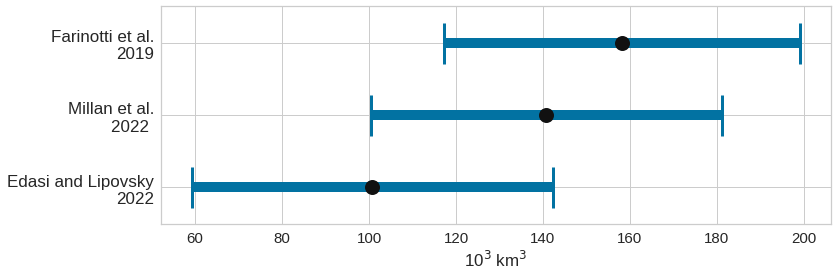

In [40]:


fig, ax = plt.subplots(1,1,figsize = (12, 4))
# plt.suptitle('Global Estimates of Mountain Glacier Volume')
x = (100.71,140.8,158.17)
yr = (41.54,40.4,41.03,)

# y = (-1, 0, 1)

y = (
     f'Edasi and Lipovsky\n2022',
     f'Millan et al.\n2022 ',
     f'Farinotti et al.\n2019',
)
plt.errorbar(x, y, xerr = yr, linestyle='None', 
             marker='o', markerfacecolor = 'k', markersize = 15, 
             ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
            )
plt.tick_params(axis='y', which='major', labelsize=17)
plt.tick_params(axis='x', which='major', labelsize=15)
# ax.margins(0.1, None)
ax.set_ylim(-0.5, 2.5)
plt.xlabel('10$^3$ km$^3$', fontsize = 17)
plt.grid(visible = True, axis = 'both')
# plt.show()
plt.savefig('figs/err_bars/global_df6.svg')
plt.savefig('figs/err_bars/global_df6.eps')
plt.savefig('figs/err_bars/global_df6.png')

In [6]:
for region in ref['region'].unique():
    dft = ref[ref['region'] == region]
    upper_bound = np.round(
        sum(dft['UB']), 2)
    
    lower_bound = np.round(
        sum(dft['LB']), 2) 

    
    print(f'Region: {region}, UB: {upper_bound}, LB: {lower_bound}')

Region: 01, UB: 3987.9, LB: 3952.06
Region: 02, UB: 97.48, LB: 95.16
Region: 03, UB: 5303.97, LB: 5624.71
Region: 04, UB: 1040.27, LB: 1116.74
Region: 05, UB: 3812.79, LB: 4355.7
Region: 06, UB: 573.21, LB: 604.15
Region: 07, UB: 796.28, LB: 820.07
Region: 08, UB: 15.22, LB: 14.36
Region: 09, UB: 1434.69, LB: 1495.37
Region: 10, UB: 17.23, LB: 15.98
Region: 11, UB: 10.41, LB: 9.33
Region: 12, UB: 7.24, LB: 6.68
Region: 13, UB: 473.83, LB: 469.87
Region: 14, UB: 588.71, LB: 575.94
Region: 15, UB: 139.86, LB: 138.77
Region: 16, UB: 18.29, LB: 19.61
Region: 17, UB: 881.29, LB: 860.47
Region: 18, UB: 25.3, LB: 24.02
Region: 19, UB: 15010.64, LB: 17019.51


In [7]:
df_errors = pd.DataFrame({
    'Model':['Farinotti Predicted', 'Farinotti Error',
             'MP2', 'MP1', 'MT1', 'MT2',
             'Edasi Predicted', 'Edasi STD', 'Edasi UB', 'Edasi LB'],
    'RGI region 01':[20.04, 5.19 , 0   , 0   , '*' , '*'  , 14.51, 4.20 , 4.01 , 3.98],
    'RGI region 02':[1.06 , 0.27 , 0   , 0   , '*' , '*'  , 0.74 , 0.11 , 0.1  , 0.09],
    'RGI region 03':[28.33, 7.35 , 25.4, 7.2 , 25.4, 7.2  , 14.22, 5.69 , 5.34 , 5.7],
    'RGI region 04':[8.61 , 2.23 , 7.0 , 2.1 , 7.0 , 2.1  , 3.96 , 1.13 , 1.05 , 1.13],
    'RGI region 05':[15.69, 4.07 , 11.8, 3.7 , 11.8, 3.7  , 19.86, 8.80 , 3.82 , 4.33],
    'RGI region 06':[3.77 , 0.98 , 3.7 , 0.9 , 3.7 , 0.9  , 1.53 , 0.62 , 0.58 , 0.61],
    'RGI region 07':[7.47 , 1.94 , 7.0 , 2.3 , 7.0 , 2.3  , 3.84 , 0.87 , 0.8  , 0.83],
    'RGI region 08':[0.30 , 0.08 , 0.29, 0.1 , 0.29, 0.1  , 0.21 , 0.02 , 0.02 , 0.01],
    'RGI region 09':[14.64, 3.80 , 15.5, 3.9 , 15.5, 3.9  , 5.10 , 1.56 , 1.45 , 1.52],
    'RGI region 10':[0.14 , 0.04 , 0.09, 0.05, 0.09, 0.05 , 0.19 , 0.02 , 0.02 , 0.02],
    'RGI region 11':[0.13 , 0.03 , 0.12, 0.05, 0.12, 0.05 , 0.17 , 0.01 , 0.01 , 0.01],
    'RGI region 12':[0.06 , 0.02 , 0.06, 0.03, 0.06, 0.03 , 0.08 , 0.01 , 0.01 , 0.01],
    'RGI region 13':[3.27 , 0.85 , 0   , 0   , '*' , '*'  , 3.42 , 0.53 , 0.48 , 0.47],
    'RGI region 14':[2.87 , 0.74 , 0   , 0   , '*' , '*'  , 3.23 , 0.64 , 0.59 , 0.58],
    'RGI region 15':[0.88 , 0.23 , 0   , 0   , '*' , '*'  , 1.10 , 0.16 , 0.14 , 0.14],
    'RGI region 16':[0.10 , 0.03 , 0.07, 0.04, 0.07, 0.04 , 0.07 , 0.02 , 0.02 , 0.02],
    'RGI region 17':[5.34 , 1.39 , 5.9 , 1.6 , 5.9 , 1.6  , 3.50 , 0.91 , 0.88 , 0.86],
    'RGI region 18':[0.07 , 0.02 , 0.07, 0.03, 0.07, 0.03 , 0.12 , 0.03 , 0.03 , 0.02],
    'RGI region 19':[46.47, 12.06, 35.1, 9.1 , 35.1, 9.1  , 23.58, 16.20, 15.13, 17.49],
})


df_errors

,Model,RGI region 01,RGI region 02,RGI region 03,RGI region 04,RGI region 05,RGI region 06,RGI region 07,RGI region 08,RGI region 09,RGI region 10,RGI region 11,RGI region 12,RGI region 13,RGI region 14,RGI region 15,RGI region 16,RGI region 17,RGI region 18,RGI region 19
0,Farinotti Predicted,20.04,1.06,28.33,8.61,15.69,3.77,7.47,0.30,14.64,0.14,0.13,0.06,3.27,2.87,0.88,0.10,5.34,0.07,46.47
1,Farinotti Error,5.19,0.27,7.35,2.23,4.07,0.98,1.94,0.08,3.80,0.04,0.03,0.02,0.85,0.74,0.23,0.03,1.39,0.02,12.06
2,MP2,0,0,25.40,7.00,11.80,3.70,7.00,0.29,15.50,0.09,0.12,0.06,0,0,0,0.07,5.90,0.07,35.10
3,MP1,0,0,7.20,2.10,3.70,0.90,2.30,0.10,3.90,0.05,0.05,0.03,0,0,0,0.04,1.60,0.03,9.10
4,MT1,*,*,25.40,7.00,11.80,3.70,7.00,0.29,15.50,0.09,0.12,0.06,*,*,*,0.07,5.90,0.07,35.10
5,MT2,*,*,7.20,2.10,3.70,0.90,2.30,0.10,3.90,0.05,0.05,0.03,*,*,*,0.04,1.60,0.03,9.10
6,Edasi Predicted,14.51,0.74,14.22,3.96,19.86,1.53,3.84,0.21,5.10,0.19,0.17,0.08,3.42,3.23,1.1,0.07,3.50,0.12,23.58
7,Edasi STD,4.2,0.11,5.69,1.13,8.80,0.62,0.87,0.02,1.56,0.02,0.01,0.01,0.53,0.64,0.16,0.02,0.91,0.03,16.20
8,Edasi UB,4.01,0.1,5.34,1.05,3.82,0.58,0.80,0.02,1.45,0.02,0.01,0.01,0.48,0.59,0.14,0.02,0.88,0.03,15.13
9,Edasi LB,3.98,0.09,5.70,1.13,4.33,0.61,0.83,0.01,1.52,0.02,0.01,0.01,0.47,0.58,0.14,0.02,0.86,0.02,17.49


In [8]:
df_errors.T

df_errors_text = df_errors.copy()

100%|██████████| 95/95 [00:00<00:00, 46943.79it/s]
19it [00:00, 2326.84it/s]
19it [00:00, 25.21it/s]


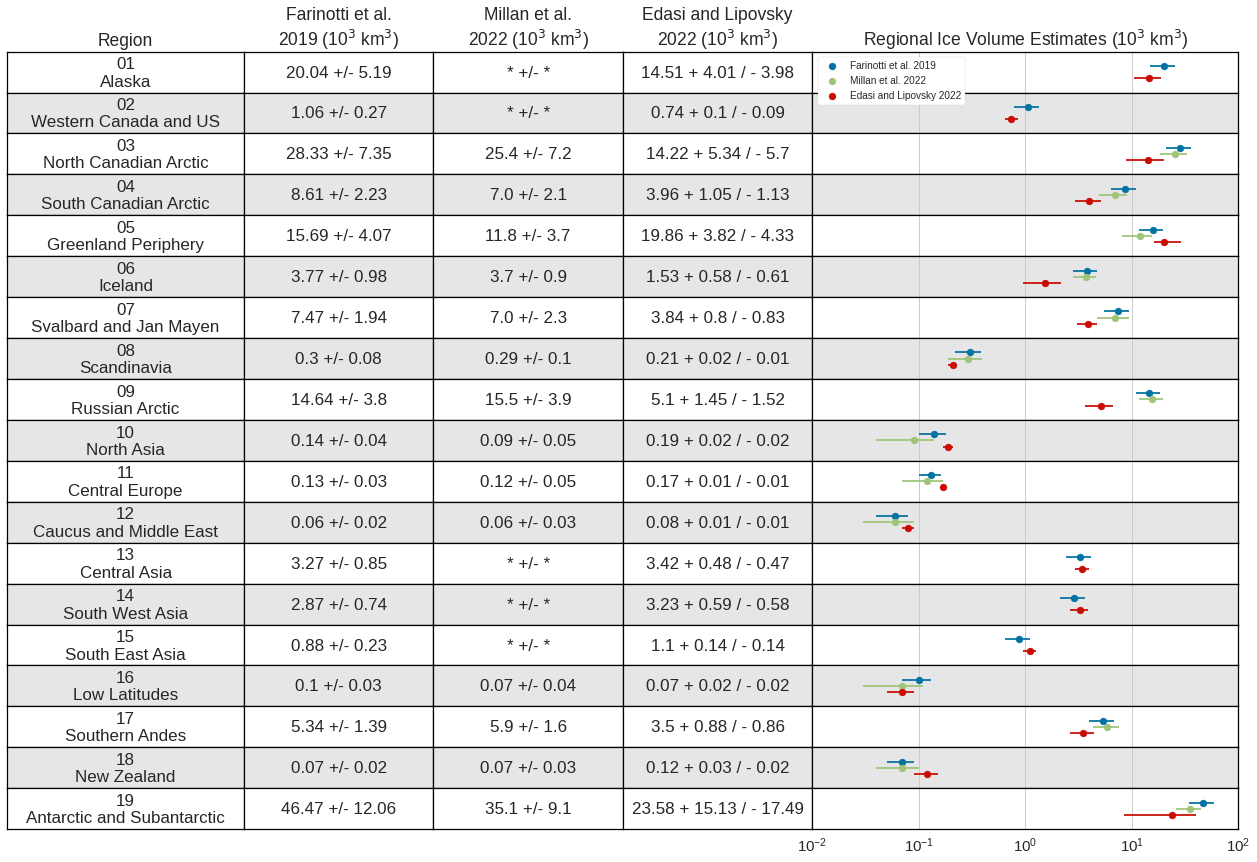

<Figure size 576x396 with 0 Axes>

In [9]:
import pylab
col1 = df_errors_text.columns[1:]

fig, axes = plt.subplots(
    ncols=5, nrows=19, figsize=(19,12),
    gridspec_kw={"width_ratios":[5,4,4,4,9]},
    sharex = True, sharey = True,
#     facecolor = '0.8'
                        )
fig.subplots_adjust(.05, 0.05, .95 , 0.95, wspace=0.0001, hspace=0.0001)
    
for ax in tqdm((axes.flatten()[:-1])):
    ax.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
    ax.ticklabel_format(useOffset=False, style="plain")
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
for ax in tqdm((axes.flatten())):

    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

#     for _, s in ax.spines.items():
#         s.set_visible(False)
#         ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
        

# border = fig.add_subplot(111)
# border.tick_params(labelbottom=0, labelleft=0, bottom=0, top=0, left=0, right=0)
# border.set_facecolor("None")

text_kw = dict(ha = 'center', va = 'bottom', size=17)

region_list = [
    'Alaska',
    'Western Canada and US',
    'North Canadian Arctic',
    'South Canadian Arctic',
    'Greenland Periphery',
    'Iceland',
    'Svalbard and Jan Mayen',
    'Scandinavia',
    'Russian Arctic',
    'North Asia',
    'Central Europe',
    'Caucus and Middle East',
    'Central Asia',
    'South West Asia',
    'South East Asia',
    'Low Latitudes',
    'Southern Andes',
    'New Zealand',
    'Antarctic and Subantarctic'
]
for i, ax in tqdm(enumerate(axes[:,0])):
#     print(i)
    ax.text(
        0.5,
        0.08, 
        col1[i][-2:] + '\n' + region_list[i], 
        transform = ax.transAxes, 
        **text_kw
    )
    
    ax.grid(visible = False)
    
# estimate and error
for i, ax in enumerate(axes[:,1]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[0]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[1] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,2]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[4]) + ' +/- ' + str(
            df_errors_text[col1[i]].loc[5] ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
for i, ax in enumerate(axes[:,3]):
        
    ax.text(
        0.5,
        0.3, 
        str(
            df_errors_text[col1[i]].loc[6]) + ' + ' + str(
            df_errors_text[col1[i]].loc[8] ) + ' / - ' + str(
            df_errors_text[col1[i]].loc[9]
        ),
        transform = ax.transAxes, 
        **text_kw
    )
    ax.grid(visible = False)
        
#         if n % 2 != 0:
#             ax.set_facecolor('0.8')

labels = [
    'Farinotti et al. 2019',
    'Millan et al. 2022',
    'Edasi and Lipovsky 2022'
]

# colors = ['C0', 'C1', 'C2']

for i, ax in tqdm(enumerate(axes[:,4])):
    #farinoitt est & errors
    x_f = df_errors[col1[i]].iloc[0]
    x_f_err = df_errors[col1[i]].loc[1]
    
    
    # Millan est & errors
    x_m = df_errors[col1[i]].iloc[2]
    
    x_m_err = df_errors[col1[i]].loc[3]
    # Edasi est & errors
    x_e = df_errors[col1[i]].iloc[6]
    x_e_err = [
        [df_errors[col1[i]].iloc[8]],
        [df_errors[col1[i]].iloc[7]]
    ]
    

    ax.scatter(
        x = x_f, 
        y = 1.5,
        c = 'C0',
#         marker = '.',
        alpha = 1,
        label = 'Farinotti et al. 2019'
    )
    ax.scatter(
        x =  x_m, 
        y = 0,
        c = 'C1',
#         marker = '.',
        alpha = 1,
        label = 'Millan et al. 2022'
    )
    ax.scatter(
        x =  x_e, 
        y = -1.5,
        c = 'C2',
#         marker = '.',
        alpha = 1,
        label = 'Edasi and Lipovsky 2022'
    )

    ax.errorbar(
        x = x_f,
        y =  1.5,
        ecolor = 'C0',
#         elinewidth = 0.5,
        xerr = x_f_err,
    )
    ax.errorbar(
        x = x_m ,
        y = 0,
        ecolor = 'C1',
#         elinewidth = 0.5,
        xerr = x_m_err,
    )
    ax.errorbar(
        x = x_e ,
        y = -1.5,
        ecolor = 'C2',
#         elinewidth = 0.5,
        xerr = x_e_err,
    )
    ax.set_xlim((0.01,100))
    ax.set_ylim((-5,5))
    ax.set_xscale('log')
    grid_kw = dict(color = 'black')
#     plt.grid(b=None)

    ax.grid(visible = False,
#             **grid_kw
           )
    ax.xaxis.grid(visible = True)
#     break

# for i, ax in tqdm(enumerate(axes[0,:])):
#     ax.set_title(df_errors['Model'].loc[i])
axes[0,0].set_title(f'Region', fontsize = 17.5,
#                    fontweight = 1000
                   )
axes[0,1].set_title(f'Farinotti et al.\n2019 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,2].set_title('Farinotti\nError')
axes[0,2].set_title(f'Millan et al.\n2022 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,4].set_title('Millan\nError')
axes[0,3].set_title(f'Edasi and Lipovsky\n2022 (10$^3$ km$^3$)', fontsize = 17.5,
#                    fontweight = 1000
                   )
# axes[0,6].set_title('Edasi\nError')
axes[0,4].set_title(f'Regional Ice Volume Estimates (10$^3$ km$^3$)',
                    fontsize = 17.5, 
#                     fontweight = 1000
                   )
plt.xticks(fontsize = 15)


for n in range(0, 19, 1):
    if n % 2 != 0:
        axes[n,0].set_facecolor('0.9')
        axes[n,1].set_facecolor('0.9')
        axes[n,2].set_facecolor('0.9')
        axes[n,3].set_facecolor('0.9')
        axes[n,4].set_facecolor('0.9')
#         axes[n,5].set_facecolor('0.8')
#         axes[n,6].set_facecolor('0.8')
#         axes[n,7].set_facecolor('0.8')

ax.legend(
    labels,
    facecolor = '1',
    framealpha = 1,
    frameon = True,
    bbox_to_anchor=(0.37,19),
)
# plt.tight_layout()
# plt.subplots_adjust(top = 1)
plt.show()
plt.savefig('figs/scatter/scatter_table_df6.eps')
plt.savefig('figs/scatter/scatter_table_df6.svg')